# Исследование объявлений о продаже квартир

**Цель исследования**<br>
Найти парметры квартиры, которые сильнее всего влияют на её стоимость.

**Ход исследования**
1. Предобрабокта данных. Работа с пропусками, дубликатами и аномальными значениями
2. Добавление новых параметров, которые могут влиять на стоимость квартиры, на основе уже известных
3. Исследование зависимости стоимости квартиры от её параметров

### Импорт данных и изучение общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#Выводим первые 20 строк таблицы
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#Выводим информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

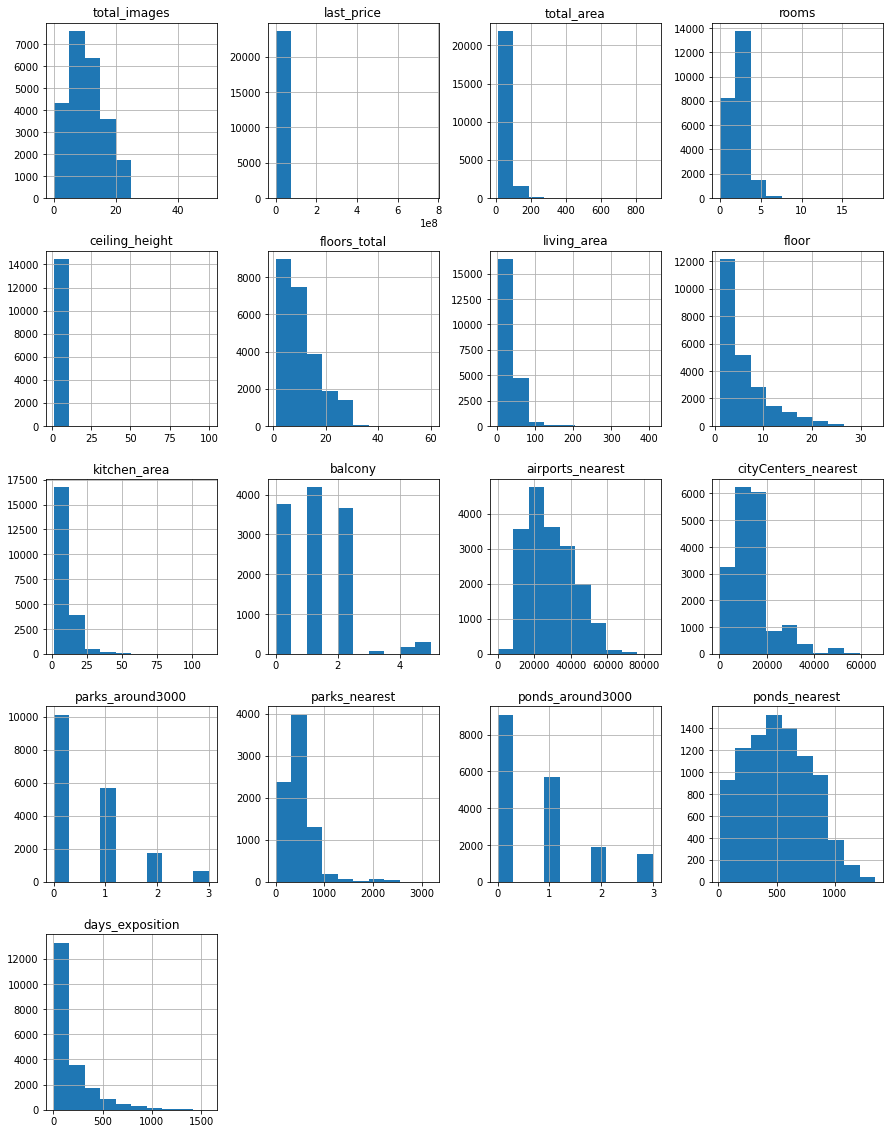

In [3]:
#Строим гистограммы столбцов
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
#Выводим количество пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#Выводим процент пропущенных значений
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Оставляем пропущенные значения в столбцах:
- 'ceiling_height' - Вероятно, продавец не смог измерить высоту потолка
- 'floors_total' - Вероятно, продавец посчитал не важным указывать это значение
- 'airports_nearest' - Вероятно, сервис не смог вычислить данные
- 'cityCenters_nearest' - Вероятно, сервис не смог вычислить данные
- 'parks_nearest' - Вероятно, сервис не смог вычислить данные
- 'ponds_nearest' - Вероятно, сервис не смог вычислить данные
- 'days_exposition' - Вероятно, сервис не смог вычислить данные
<br><br>
Работаем со столбцами:
- 'living_area'
- 'is_apartment'
- 'kitchen_area'
- 'balcony'
- 'parks_around3000'
- 'ponds_around3000'
- 'locality_name'

<b>Убираем пропущенные значения в столбце living_area</b>

Пустые значения жилой площади могут быть у квартир-студий или у квартир со свободной планировкой. Проверим

In [6]:
#Отношение числа квартир свободной планировки с пустой living_area к общему числу квартир со свободной планирвокой
print(len(data.loc[(data['living_area'].isna()) & (data['open_plan'])])/len(data.loc[data['open_plan']]))

#Отношение числа квартир-студий с пустой living_area к общему числу квартир-студий
print(len(data.loc[(data['living_area'].isna()) & (data['studio'])])/len(data.loc[data['studio']]))

0.07462686567164178
0.06711409395973154


Вывод: Число квартир с освободной планировкой и число квартир-студий с пустыми значениями не совпадает с общим числом таких квартир. Значит, пустое значение living_area не зависит от того, является ли квартира студией или имеет свободную планировку

In [7]:
#Заполним пропущенные значения жилой площади путём умножения общей площади на долю жилой площади от общей. 
#Для вычисления доли жилой площади от общей разделим квартиры на несколько групп. Вычислим медиану для каждой группы

#Отношение жилой площади к общей площади для квартир до 50 м2
print('до 50 м2:', data.query('total_area < 50')['living_area'].median()/data.query('total_area < 50')['total_area'].median())

#- для квартир от 50 до 100 м2
print('от 50 до 100 м2:', data.query('50 < total_area < 100')['living_area'].median()/data.query('50 < total_area < 100')['total_area'].median())

#- для квартир от 100 до 200 м2)
print('от 100 до 200 м2', data.query('100 < total_area < 200')['living_area'].median()/data.query('100 < total_area < 200')['total_area'].median())

#- для квартир от 200 до 300 м2
print('от 200 до 300 м2', data.query('200 < total_area < 300')['living_area'].median()/data.query('200 < total_area < 300')['total_area'].median())

#- для квартир от 300 до 400 м2
print('от 300 до 400 м2', data.query('300 < total_area < 400')['living_area'].median()/data.query('300 < total_area < 400')['total_area'].median())

#- для квартир от 400 до 500 м2
print('от 400 до 500 м2', data.query('400 < total_area < 500')['living_area'].median()/data.query('400 < total_area < 500')['total_area'].median())

#- для квартир от 500 до 600 м2
print('от 500 до 600 м2', data.query('500 < total_area < 600')['living_area'].median()/data.query('500 < total_area < 600')['total_area'].median())

до 50 м2: 0.4666666666666667
от 50 до 100 м2: 0.6143079315707621
от 100 до 200 м2 0.5958677685950413
от 200 до 300 м2 0.6323404255319148
от 300 до 400 м2 0.5494152046783626
от 400 до 500 м2 0.5509647976251135
от 500 до 600 м2 0.6421663442940039


Вывод: для вычисления жилой площади группы "от 300 до 400 м2" и "от 400 до 500 м2" можно объединить и принять медиану 0.55

In [8]:
#Заполняем пустые жилой площади значения для квартир площадью до 50 м2
data.loc[(data['total_area'] < 50) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['total_area'] < 50) & (data['living_area'].isna()), 'total_area'] * 0.466

#- для квартир площадью от 50 до 100 м2
data.loc[(data['total_area'] >= 50) & (data['total_area'] < 100) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['total_area'] >= 50) & (data['total_area'] < 100) & (data['living_area'].isna()), 'total_area'] * 0.614

#- для квартир площадью от 100 до 200 м2
data.loc[(data['total_area'] >= 100) & (data['total_area'] < 200) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['total_area'] >= 100) & (data['total_area'] < 200) & (data['living_area'].isna()), 'total_area'] * 0.595

#- для квартир площадью от 200 до 300 м2
data.loc[(data['total_area'] >= 200) & (data['total_area'] < 300) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['total_area'] >= 200) & (data['total_area'] < 300) & (data['living_area'].isna()), 'total_area'] * 0.632

#- для квартир площадью от 300 до 500 м2
data.loc[(data['total_area'] >= 300) & (data['total_area'] < 500) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['total_area'] >= 300) & (data['total_area'] < 500) & (data['living_area'].isna()), 'total_area'] * 0.55

#- для квартир площадью от 500 до 600 м2
data.loc[(data['total_area'] >= 500) & (data['total_area'] < 600) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['total_area'] >= 500) & (data['total_area'] < 600) & (data['living_area'].isna()), 'total_area'] * 0.642

<b>Убираем пропущенные значения в столбце is_apartment</b>

In [9]:
#Выводим количество уникальных значений столбца 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Вывод: Пустые значения, вероятно, False. Заменяем

In [10]:
#Заменяем пустые значения в столбце 'is_apartment' на False
data['is_apartment'] = data['is_apartment'].fillna(False)

<b>Убираем пропущенные значения в столбце kitchen_area</b>

Пустые значения площади кухни могут быть у квартир-студий или у квартир со свободной планировкой. Проверим

In [11]:
#Отношение числа квартир свободной планировки с пустой kitchen_area к общему числу квартир со свободной планирвокой
print(len(data.loc[(data['kitchen_area'].isna()) & (data['open_plan'])])/len(data.loc[data['open_plan']]))

#Отношение числа квартир-студий с пустой kitchen_area к общему числу квартир-студий
print(len(data.loc[(data['kitchen_area'].isna()) & (data['studio'])])/len(data.loc[data['studio']]))

1.0
1.0


Вывод: Количество квартир с пустой kitchen_area и свободной планировкой совпадает с общим числом квартир со свободной планировкой. Значит, квартиры со свободной планировкой имеют пустую площадь кухни, что логично. Аналогично для квартир - студий.

In [12]:
#Проверим квартиры с пустой площадью кухни, которые не являются студиями и не имеют свободную планировку
data.loc[(data['kitchen_area'].isna()) & (~data['open_plan'].isna()) & (~data['studio'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,94.6050,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,15.2848,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,21.3428,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,18.6400,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,21.6690,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6000,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,54.0320,1,False,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,21.2496,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9.0,16.3100,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Вывод: считаю нелогичным заполнять пустые площади кухни как процент от общей площади, вычисленный по исзвестным параметрам. Оставляем пустые значения площади кухни. 

<b>Убираем пропущенные значения в столбце balcony</b>

In [13]:
#Выводим количество уникальных значений столбца 'balcony'
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Вывод: Пустые значения, вероятно, соответствуют 0. Заменяем

In [14]:
#Заменяем пустые значения в столбце 'balcony' на 0
data['balcony'] = data['balcony'].fillna(0)

<b>Убираем пропущенные значения в столбцах parks_around3000 и ponds_around3000</b>

In [15]:
#Выводим число уникальных значений в столбцах 'parks_around3000', 'ponds_around3000'
print(data['parks_around3000'].unique())
print(data['ponds_around3000'].unique())

[ 1.  0.  2. nan  3.]
[ 2.  0.  3.  1. nan]


Вывод: можно предположить, что пустые значения соответствуют 0, поэтому заменяем их на 0

In [16]:
#Заменяем пустые значения в столбцах 'parks_around3000', 'pounds_around3000' на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<b>Убираем пропущенные значения в столбце localirty_name</b>

In [17]:
#Заменяем пустые значения в столбцах 'Localirty_name' на 'неизвестно'
data['locality_name'] = data['locality_name'].fillna('неизвестно')

In [18]:
#Выводим количество пустых значений для проверки
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 1
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изменяем типы данных в столбцах на int:
- last_price
- floors_total
- balcony
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

In [19]:
#Меняем типы данных в столбцах на int, т.к. значения все в этих столбцах - целые числа
    
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Устраняем неявные дубликаты в названиях населённых пунктов

In [20]:
#Выводим список уникальных значений столбца 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Найдены типы населённых пунктов:
- посёлок
- поселок
<br><br>
- городской посёлок
- городской поселок
<br><br>
- посёлок городского типа
- поселок городского типа
<br><br>
- коттеджный поселок
- коттеджный посёлок
<br><br>
- посёлок станции
- поселок станции
- посёлок при железнодорожной станции
<br><br>
- садовое товарищество
- садоводческое некоммерческое товарищество
<br><br>
- село 
<br><br>
- деревня

In [21]:
#Устраняем дубликаты типов населённых пунктов в столбце 'locality_name'

#Замена "посёлок" на "поселок"
def poselok(row):
    if 'посёлок' in row['locality_name']:
        return row['locality_name'].replace('посёлок', 'поселок')
    else:
        return row['locality_name']
    
data['locality_name'] = data.apply(poselok, axis=1)

#Замена "поселок городского типа" на "городской поселок"
def poselok_gorod(row):
    if 'поселок городского типа' in row['locality_name']:
        return row['locality_name'].replace('поселок городского типа', 'городской поселок')
    else:
        return row['locality_name']
    
data['locality_name'] = data.apply(poselok_gorod, axis=1)

#Замена "поселок при железнодорожной станции" на "поселок станции"
def poselok_stan(row):
    if 'поселок при железнодорожной станции' in row['locality_name']:
        return row['locality_name'].replace('поселок при железнодорожной станции', 'поселок станции')
    else:
        return row['locality_name']
    
data['locality_name'] = data.apply(poselok_stan, axis=1)

#Замена "садоводческое некоммерческое товарищество" на "садовое товарищество"
def sadovoe(row):
    if 'садоводческое некоммерческое товарищество' in row['locality_name']:
        return row['locality_name'].replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
    else:
        return row['locality_name']
    
data['locality_name'] = data.apply(sadovoe, axis=1)

In [22]:
#Выводим обновлённые названия столбца 'locality_name' для поиска дубликатов в названиях населённых пунктов
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'городской поселок Красный Бор' 'Гатчина' 'деревня Фёдоровское' 'Выборг'
 'Кронштадт' 'Кировск' 'деревня Новое Девяткино' 'поселок Металлострой'
 'городской поселок Лебяжье' 'городской поселок Сиверский'
 'поселок Молодцово' 'городской поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'городской поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка'

Найдены дубликаты в названиях населённых пунктов. После проверки информации из открытых источников в интернете сделаны следующие выводы:
- поселок <b>Мурино</b>
- <b>Мурино</b>
<br>
Вывод: один населённый пункт - <b>Мурино</b>
<br><br>
- деревня <b>Кудрово</b>
- <b>Кудрово</b>
<br>
Вывод: один НП - <b>Кудрово</b>
<br><br>
- деревня <b>Фёдоровское</b>
- городской поселок <b>Фёдоровское</b>
<br>
Вывод: один НП - городской поселок <b>Фёдоровское</b>
<br><br>
- <b>Никольское</b>
- село <b>Никольское</b>
<br>
Вывод: разные НП
<br><br>
- село <b>Павлово</b>
- городской поселок <b>Павлово</b>
<br>
Вывод: разные НП
<br><br>
- поселок <b>Зимитицы</b>
- деревня <b>Зимитицы</b>
<br>
Вывод: разные НП
<br><br>
- поселок <b>Рябово</b>
- городской поселок <b>Рябово</b>
<br>
Вывод: Разные НП
<br><br>
- деревня <b>Калитино</b>
- поселок <b>Калитино</b>
<br>
Вывод: Разные НП
<br><br>
- поселок <b>Щеглово</b>
- деревня <b>Щеглово</b>
<br>
Вывод: Разные НП
<br><br>
- деревня <b>Рабитицы</b>
- поселок <b>Рабитицы</b>
<br>
Вывод: Разные НП
<br><br>
- деревня <b>Гарболово</b>
- поселок <b>Гарболово</b>
<br> 
Данные о деревне есть, о посёлке данных нет. Параметры квартир находятся в одном диапазоне, данные ниже.<br>
Вывод: один НП - деревня <b>Гарболово</b>
<br><br>
- <b>Любань</b>
- поселок <b>Любань</b>
<br>
Вывод: разные НП
<br><br>
- поселок станции <b>Громово</b>
- поселок <b>Громово</b>
<br>
Вывод: разные НП
<br><br>
- поселок <b>Лесное</b>
- коттеджный поселок <b>Лесное</b>
<br>
Вывод: Разные НП

In [23]:
#Выводим и данные по НП 'деревня Гарболово'
data.query('locality_name == "деревня Гарболово"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3177,10,1800000,45.7,2018-09-22T00:00:00,2,2.50,5.0,28.5,5,False,...,5.2,1,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,NaN
6323,15,2200000,42.2,2018-08-11T00:00:00,2,2.65,5.0,26.8,2,False,...,6.0,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,237.0
6449,20,2650000,46.9,2018-03-26T00:00:00,2,2.50,5.0,28.0,4,False,...,8.0,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,323.0
6684,5,1200000,32.0,2016-03-09T00:00:00,1,2.80,2.0,18.0,2,False,...,5.0,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,810.0
8434,14,2250000,47.0,2019-02-28T00:00:00,2,2.60,5.0,28.0,4,False,...,9.0,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,45.0
10029,4,2100000,42.0,2017-08-18T00:00:00,2,2.55,5.0,27.0,1,False,...,6.0,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,217.0
10921,11,2170000,49.1,2018-10-05T00:00:00,2,2.55,5.0,28.4,4,False,...,7.1,4,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,82.0
14105,16,2500000,48.2,2018-02-01T00:00:00,2,2.50,5.0,27.5,3,False,...,7.6,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,53.0
18814,20,1200000,31.0,2018-03-26T00:00:00,1,2.50,5.0,16.0,1,False,...,7.1,0,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,312.0
19565,10,2500000,55.4,2019-04-02T00:00:00,2,NaN,2.0,29.9,1,False,...,9.0,2,деревня Гарболово,NaN,NaN,0,NaN,0,NaN,NaN


In [24]:
#Выводим данные по НП 'поселок Гарболово'
data.query('locality_name == "поселок Гарболово"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15211,2,1600000,32.0,2017-05-07T00:00:00,1,2.5,5.0,17.0,2,False,...,5.5,1,поселок Гарболово,NaN,NaN,0,NaN,0,NaN,150.0
17139,1,1750000,31.2,2017-11-10T00:00:00,1,NaN,5.0,16.6,3,False,...,5.5,1,поселок Гарболово,NaN,NaN,0,NaN,0,NaN,6.0
17555,3,1550000,31.4,2015-09-19T00:00:00,1,2.5,5.0,14.3,2,False,...,7.9,0,поселок Гарболово,NaN,NaN,0,NaN,0,NaN,758.0
20561,1,3100000,58.7,2017-11-22T00:00:00,2,NaN,2.0,29.9,1,False,...,9.1,2,поселок Гарболово,NaN,NaN,0,NaN,0,NaN,21.0


Заменяем названия нас.пунктов:
- поселок Мурино на Мурино
- деревня Кудрово на Кудрово
- деревня Фёдоровское на городской поселок Фёдоровское
- поселок Гарболово на деревня Гарболово


In [25]:
data.loc[data['locality_name'] == 'поселок Мурино', 'locality_name'] = 'Мурино'
data.loc[data['locality_name'] == 'деревня Кудрово', 'locality_name'] = 'Кудрово'
data.loc[data['locality_name'] == 'деревня Фёдоровское', 'locality_name'] = 'городской поселок Фёдоровское'
data.loc[data['locality_name'] == 'поселок Гарболово', 'locality_name'] = 'деревня Гарболово'

In [26]:
#Проверяем явные дубликаты
data.duplicated().sum()

0

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'last_price'</b>

In [27]:
#Выводим числовое описание данных
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Вывод: минимальное и максимальное значение выглядят как аномалии. Проверим

In [28]:
#Выводим строку с минимальным значением 'last_price'
data.loc[data['last_price'] == data['last_price'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


In [29]:
#Выводим первые 5 минимальных значений 'last_price'
data['last_price'].sort_values().head()

8793      12190
17456    430000
14911    430000
16274    440000
17676    450000
Name: last_price, dtype: int64

Вывод: Следющие минимальные значения столбца 'last_price' отличаются на порядок. Значит, значение 12190 - аномалия. Возможно, возникла ошибка и объявление было опубликовано заново, т.к. параметр days_exposition = 8 дням. Проверим датасет на объявление с аналогичными параметрами

In [30]:
#Выводим строки датасета с аналогичными параметрами в столбцах 'total_area' и 'floors_total'
data.query('(total_area == 109.0) & (floors_total == 25)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
10601,15,10900000,109.0,2017-02-01T00:00:00,3,3.00,25.0,49.0,7,False,...,16.0,5,Санкт-Петербург,40584.0,12398.0,3,447.0,0,NaN,472.0
17570,20,12180000,109.0,2018-04-27T00:00:00,3,2.80,25.0,49.9,24,False,...,18.9,3,Санкт-Петербург,52212.0,16802.0,0,NaN,1,733.0,259.0
18169,20,12600000,109.0,2017-07-16T00:00:00,2,2.75,25.0,53.0,13,False,...,19.0,1,Санкт-Петербург,36724.0,9781.0,1,645.0,0,NaN,NaN


Вывод: Новое объявление не найдено. Но, если изучить объявления с аналогичными параметрами, то можно сделать вывод, что цена была указана ошибочно, меньше реальной в 1000 раз. Вероятно, цена была указана в тысячах тысяч вместо миллионов. Восстанавливаем корректное значение

In [31]:
data.loc[data['last_price'] == data['last_price'].min(), 'last_price'] = data['last_price'].min()*1000

#Выводим значение столбца 'last_price' нужной строки для проверки
data.loc[8793, 'last_price']

12190000

In [32]:
#Проверяем строку с максимальным значением 'last_price'
data.loc[data['last_price'] == data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0


In [33]:
#Выводим последние 20 максимальных значений 'last_price'
data['last_price'].sort_values().tail(20)

3117     140000000
12674    140000000
22229    148000000
7857     150000000
15016    150000000
1026     155000000
16495    159000000
2536     159984000
19155    160000000
19865    180000000
8900     190870000
5893     230000000
13749    240000000
16461    245000000
22831    289238400
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, dtype: int64

<AxesSubplot:>

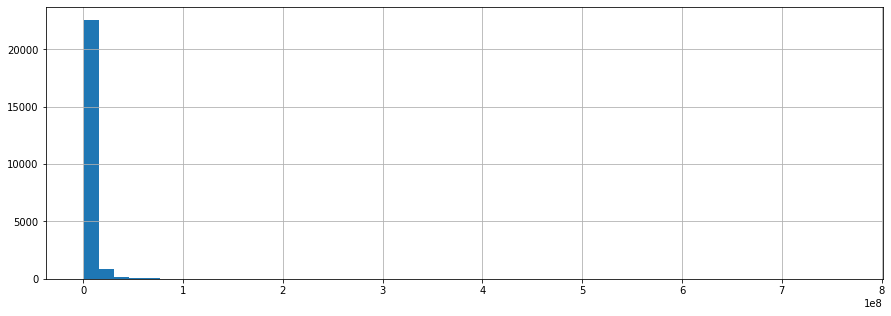

In [34]:
#Строим гистограмму распределения
data['last_price'].hist(bins = 50, figsize=(15, 5))

Рассмотрим диапазон от 430 000 до 100 000 000

<AxesSubplot:>

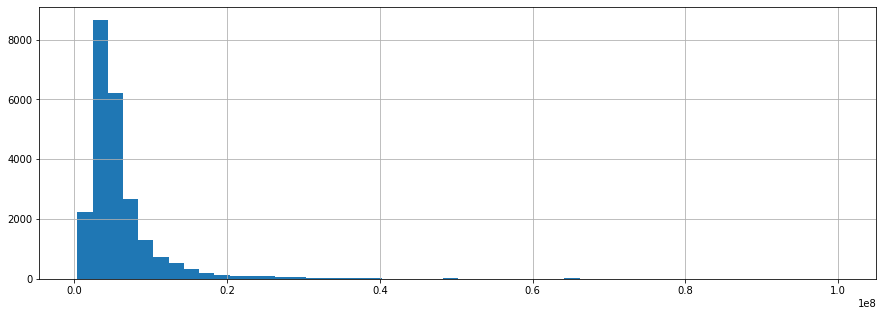

In [35]:
data['last_price'].hist(bins = 50, range=(430000, 100000000), figsize=(15, 5))

<AxesSubplot:>

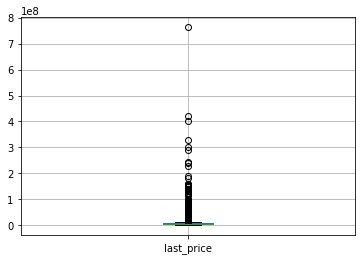

In [36]:
#Построим диаграмму размаха
data.boxplot(column='last_price')

Рассмотрим нормальные значения

<AxesSubplot:>

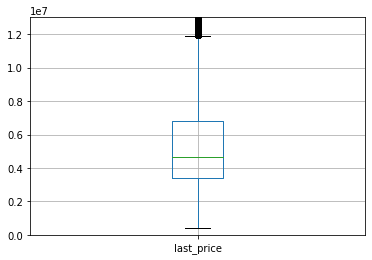

In [37]:
plt.ylim(-1000, 13000000)
data.boxplot(column='last_price')

Рассмотрим область выбросов

<AxesSubplot:>

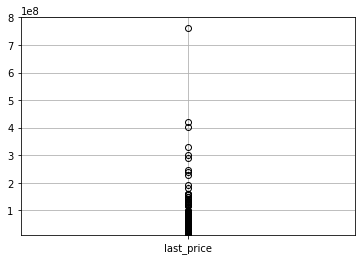

In [38]:
plt.ylim(11000000, 800000000)
data.boxplot(column='last_price')

Выделяется несколько выбросов после значения 200 000 000. Рассмотрим область выбросов без этих значений

<AxesSubplot:>

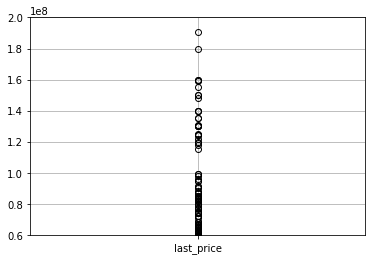

In [39]:
plt.ylim(60000000, 200000000)
data.boxplot(column='last_price')

Заметно разрежение плотности выбросов после значения 100 000 000. Посчитаем долю объявлений с ценой больше этого значения.

In [40]:
#Выводим процент объявлений с ценой свыше 100 000 000
len(data.query('last_price > 100000000'))/len(data)*100

0.15612473100130808

Вывод: Доля значений с ценой свыше 100 000 000 составляет всего 0,15%. Строки со значением цены свыше этой можно исключить из таблицы

In [41]:
data = data.query('last_price < 100000000')

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'total_area'</b>

In [42]:
#Выведем числовое описание данных
data['total_area'].describe()

count    23662.000000
mean        59.928048
std         33.471517
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

<AxesSubplot:>

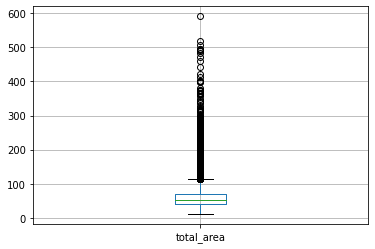

In [43]:
#Построим диаграмму размаха
data.boxplot(column='total_area')

Выделяется выброс около 600. Выведем последние 10 максимальных значений столбца для проверки

In [44]:
data['total_area'].sort_values().tail(10)

20273    460.8
6221     470.3
660      483.9
6621     488.0
22494    491.0
9826     494.1
12401    495.0
8018     507.0
4237     517.0
5358     590.0
Name: total_area, dtype: float64

Большой разницы между максимальным значением и предыдущими 9-ю нет. Выводим все параметры 5-и последних объявлений с максимальной площадью

In [45]:
data.sort_values(by='total_area').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9826,1,43185328,494.1,2017-05-12T00:00:00,1,2.85,12.0,271.755,3,False,...,NaN,0,Санкт-Петербург,28529.0,6832.0,1,592.0,0,NaN,5.0
12401,20,91500000,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.500,7,False,...,25.0,0,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,14.0
8018,20,84000000,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.500,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0
4237,1,50000000,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.000,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.000,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0


Вывод: остальные параметры квартир соответствуют площади. Ошибки в данных нет

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'rooms'</b>

In [46]:
#Выводим первые и последние значения в отсортированном столбце
data['rooms'].sort_values()

16144     0
946       0
14064     0
12737     0
11035     0
         ..
866      14
20829    14
5358     15
18848    16
14498    19
Name: rooms, Length: 23662, dtype: int64

0 комнат может быть у квартир-студий или у квартир со свободной планировкой. Проверим, есть ли в таблице квартиры с 0 комнат, которые не являются студиями или не имеют свободную планировку

In [47]:
data.loc[data['rooms'] == 0 & (~data['studio']) & (~data['open_plan'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.500,2,False,...,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.000,1,False,...,NaN,0,Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.750,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.300,19,False,...,NaN,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000,25.00,2019-02-20T00:00:00,0,NaN,10.0,11.650,7,False,...,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.000,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.000,4,False,...,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000,26.00,2018-09-07T00:00:00,0,NaN,19.0,12.116,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.000,8,False,...,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Вывод: это аномалии. Удаляем такие значения

In [48]:
data = data.loc[~(data['rooms'] == 0 & (~data['studio']) & (~data['open_plan']))]

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'ceiling_height'</b>

In [49]:
#Выводим список уникальных значений столбца
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [50]:
#Выведем числовое описание данных
data['ceiling_height'].describe()

count    14397.000000
mean         2.767957
std          1.248170
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

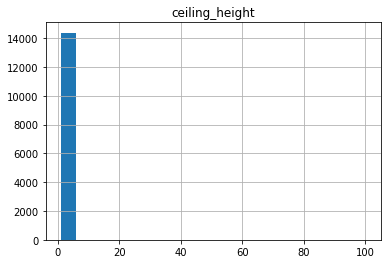

In [51]:
#Построим гистограмму распределения
data.hist(column='ceiling_height', bins=20)

<AxesSubplot:>

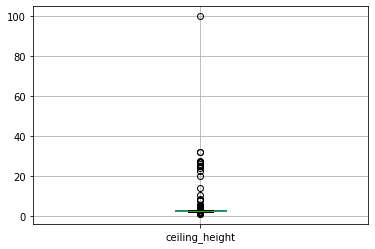

In [52]:
#Построим диаграмму размаха
data.boxplot(column='ceiling_height')

In [53]:
#Проверим минимальные значения
data['ceiling_height'].sort_values().head(20)

22590    1.00
5712     1.20
16934    1.75
552      2.00
19329    2.00
2572     2.00
16446    2.00
16884    2.00
11352    2.00
22960    2.00
5850     2.00
20520    2.00
4212     2.00
19098    2.00
12755    2.20
17794    2.25
5498     2.30
17762    2.30
23498    2.30
1582     2.30
Name: ceiling_height, dtype: float64

In [54]:
#Проверим параметры квартиры с высотой потолка 1, 1.2 и 1.75 м.
data.query('ceiling_height == 1 | ceiling_height == 1.2 | ceiling_height == 1.75')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0,городской поселок Мга,NaN,NaN,0,NaN,0,NaN,248.0
16934,5,4100000,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
22590,16,6000000,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0


Вывод: природа аномалии не понятня, удаляем объявления

In [55]:
data = data.query('ceiling_height != 1 & ceiling_height != 1.2 & ceiling_height != 1.75')
len(data)

23462

Отдельно рассмотрим квартиры с высотой потолка 2 м.

In [56]:
data.query('ceiling_height == 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000,33.50,2017-03-30T00:00:00,1,2.0,15.0,17.500,6,False,...,6.5,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
2572,4,2400000,62.00,2018-12-27T00:00:00,3,2.0,5.0,40.000,4,False,...,6.0,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN
4212,1,2120000,35.43,2017-12-18T00:00:00,1,2.0,18.0,16.600,9,False,...,8.8,2,Тосно,NaN,NaN,0,NaN,0,NaN,36.0
5850,9,1650000,35.50,2018-05-29T00:00:00,1,2.0,5.0,16.543,5,False,...,NaN,0,Луга,NaN,NaN,0,NaN,0,NaN,100.0
11352,4,3300000,36.00,2017-06-18T00:00:00,1,2.0,17.0,15.200,12,False,...,10.1,0,поселок Металлострой,25268.0,26980.0,0,NaN,0,NaN,53.0
16446,6,12300000,88.30,2019-03-12T00:00:00,3,2.0,5.0,63.900,2,False,...,12.0,0,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,NaN
16884,0,1500000,33.00,2018-10-03T00:00:00,1,2.0,5.0,20.000,5,False,...,6.0,0,Выборг,NaN,NaN,0,NaN,0,NaN,6.0
19098,7,2700000,56.00,2018-02-04T00:00:00,3,2.0,5.0,46.000,1,False,...,6.0,0,Выборг,NaN,NaN,0,NaN,0,NaN,282.0
19329,5,1700000,40.00,2018-07-15T00:00:00,2,2.0,9.0,18.640,8,False,...,NaN,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.0
20520,9,3600000,38.00,2018-07-05T00:00:00,1,2.0,12.0,15.000,9,False,...,11.8,1,Кудрово,NaN,NaN,0,NaN,0,NaN,62.0


Высота потолка ровно 2 м. маловероятна. Возможно, значение было указано как "чуть больше 2 м." Сравнив данные по квартирам с высотой потолка со значениями 2.25(1 квартира) и 2.3(4 квартиры) пришёл к выводу, что высоту потолка 2 можно заменить на 2.3 

In [57]:
data.loc[data['ceiling_height'] == 2, 'ceiling_height'] = 2.3

In [58]:
#Проверим максимальные значения
data.loc[~data['ceiling_height'].isna()]['ceiling_height'].sort_values().tail(20)

5076      24.0
11285     25.0
18545     25.0
4643      25.0
9379      25.0
6246      25.0
14382     25.0
355       25.0
5669      26.0
10773     27.0
21824     27.0
5246      27.0
22938     27.0
20478     27.0
17857     27.0
5807      27.0
21377     27.5
22336     32.0
3148      32.0
22869    100.0
Name: ceiling_height, dtype: float64

Рассмотри параметры квартиры с максимальным значением высоты потолка в 100 м

In [59]:
data.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0


Можно предположить, что это пентхаус с высотой потолка в 10 м. Но у квартиры очень маленькая площадь и высота дома составляет 5 этажей.
Вывод: Это аномалия, удаляем

In [60]:
#Удаляем строку с индексом 22869
data = data.drop(index=22869)

Рассмотрим остальные уникальные значения высоты потолка. Высота до 10 м. возможна - это могут быть квартиры в домах старой постройки, 2-х уровневые квартиры со вторым светом или пентхаусы.
Проверим квартиры со следующими значениями высоты потолка:<br>
- 14<br>
- 20 - вероятно высота "чуть выше 2 м."<br>  
- 22.6,  24,  25,  26, 27, 27.5, 32 - вероятно, значения нужно поделить на 10

In [61]:
data.query('ceiling_height == 14')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,False,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315.0


Высота потолка совпадает с с числом этажей дома. Вероятно, значение столбца 'floors_total' было также указано в 'ceiling_height' по ошибке.<br>
Вывод: заменим высоту этажа в этой строке на медиану для 14-этажных домов.

In [62]:
data.loc[data['ceiling_height'] == 14, 'ceiling_height'] = data.loc[data['floors_total'] == 14, 'ceiling_height'].median()

In [63]:
#Проверим строки с высотой 20
data.query('ceiling_height == 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17496,15,6700000,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,False,...,12.0,5,Санкт-Петербург,16295.0,15092.0,1,967.0,0,NaN,NaN


Природа аномалии не понятна. заменим высоту этажа в этой строке на медиану для 17-этажных домов.

In [64]:
data.loc[data['ceiling_height'] == 20, 'ceiling_height'] = data.loc[data['floors_total'] == 17, 'ceiling_height'].median()

In [65]:
#Поделим вышеперечисленные значения высоты потолка на 10
data.loc[data['ceiling_height'] > 11, 'ceiling_height'] = data.loc[data['ceiling_height'] > 11, 'ceiling_height'] / 10

Минимальные и максимальные аномалии устранены. Заново выведем числовое описание данных и гистограмму

In [66]:
#Выводим числовое описание данных
data['ceiling_height'].describe()

count    14393.000000
mean         2.726716
std          0.293791
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

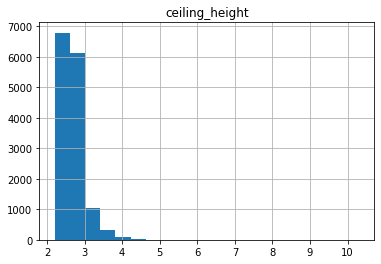

In [67]:
#Выводим гистограмму распределения
data.hist(column='ceiling_height', bins=20)

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'floors_total'</b>

In [68]:
#Выводим список уникальных значений столбца floors_total
data['floors_total'].sort_values().unique()
#data.query('floors_total == 60')

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

Вывод: 60 этажей, вероятно, ошибка, должно быть 6. 

In [69]:
#Проверим квартиру в доме где 60 этажей
data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0


Вывод: Вероятно, ошибка. Заменяем 60 на 6

In [70]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6

In [71]:
#Проверяем значение 52
data.query('floors_total == 52')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3978000,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,...,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45.0


Вывод: вероятно, 52 было указано вместо 25. Исправляем

In [72]:
data.loc[data['floors_total'] == 52, 'floors_total'] = 25

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'living_area'</b>

In [73]:
#Выведем числовое описание данных
data['living_area'].describe()

count    23461.000000
mean        34.470719
std         21.521475
min          2.000000
25%         18.700000
50%         30.100000
75%         42.500000
max        409.000000
Name: living_area, dtype: float64

<AxesSubplot:>

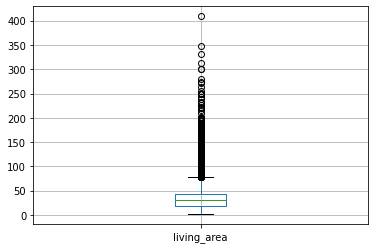

In [74]:
#Построим диаграмму размаха
data.boxplot(column='living_area')

In [75]:
#Проверим выбросы после 200
data.query('living_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
581,20,65000000,365.00,2019-03-18T00:00:00,7,2.90,7.0,200.750,7,False,...,NaN,0,Санкт-Петербург,19827.0,1690.0,3,378.0,3,58.0,NaN
660,3,49950000,483.90,2017-10-04T00:00:00,7,3.20,6.0,312.500,4,False,...,26.40,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0
866,5,25000000,363.00,2017-12-23T00:00:00,14,3.16,5.0,222.000,4,False,...,16.60,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
1085,16,75000000,323.00,2017-07-10T00:00:00,5,4.00,5.0,255.700,4,False,...,66.00,0,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259.0
1388,20,59800000,399.00,2015-01-21T00:00:00,5,5.60,6.0,219.450,6,False,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
1494,10,65000000,364.00,2018-11-27T00:00:00,7,3.90,6.0,250.000,3,False,...,20.00,0,Санкт-Петербург,21988.0,3254.0,0,NaN,1,689.0,46.0
2580,6,30900000,338.60,2017-10-16T00:00:00,7,3.86,6.0,230.000,4,False,...,20.00,0,Санкт-Петербург,24957.0,5641.0,0,NaN,0,NaN,406.0
3676,12,28789000,441.98,2019-01-23T00:00:00,4,NaN,6.0,243.089,6,False,...,35.05,0,Санкт-Петербург,20552.0,5181.0,0,NaN,0,NaN,NaN
4237,1,50000000,517.00,2017-10-14T00:00:00,7,NaN,4.0,332.000,3,False,...,22.00,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN
5358,20,65000000,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.000,3,False,...,100.00,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0


Вывод: аномальных данных не обнаружено. Проверим минимальные значения

In [76]:
data['living_area'].sort_values().head(20)

13915    2.0000
23574    3.0000
3242     3.0000
21943    5.4000
16431    6.0000
19546    6.0580
17961    6.0580
19558    6.1512
19251    6.5000
16949    6.9900
12040    6.9900
23208    8.0000
20994    8.0000
22356    8.0152
114      8.3000
20714    8.3880
2309     8.4000
21505    8.5000
12881    8.6210
17248    8.9000
Name: living_area, dtype: float64

Проверим квартиры с жилой площадью до 10 м2

In [77]:
data.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.3000,7,False,...,6.3,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN
680,14,7200000,43.00,2017-10-31T00:00:00,1,NaN,8.0,9.0000,2,False,...,23.0,0,Санкт-Петербург,23900.0,5232.0,1,2137.0,1,933.0,296.0
1326,8,8100000,52.00,2017-01-29T00:00:00,2,2.70,25.0,9.0000,15,False,...,32.0,2,Санкт-Петербург,35555.0,15561.0,0,NaN,1,1180.0,337.0
1608,12,2150000,20.10,2019-01-30T00:00:00,1,NaN,9.0,9.3666,1,True,...,NaN,0,Санкт-Петербург,26646.0,12147.0,0,NaN,0,NaN,13.0
2309,10,4200000,62.40,2017-06-15T00:00:00,2,2.60,9.0,8.4000,6,False,...,41.0,2,поселок Шушары,23662.0,29448.0,0,NaN,0,NaN,111.0
3242,7,4440000,41.00,2017-07-02T00:00:00,1,NaN,17.0,3.0000,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
4100,17,5300000,34.80,2017-06-19T00:00:00,1,2.70,23.0,9.0000,15,False,...,17.1,0,Санкт-Петербург,33626.0,13495.0,0,NaN,0,NaN,30.0
4542,12,3300000,18.00,2018-11-07T00:00:00,1,3.50,5.0,9.0000,2,False,...,NaN,0,Санкт-Петербург,25157.0,4948.0,2,349.0,1,963.0,9.0
7312,8,3400000,27.00,2018-02-21T00:00:00,2,2.50,15.0,9.0000,4,False,...,16.0,0,Санкт-Петербург,50246.0,16444.0,1,617.0,0,NaN,NaN
8325,9,4800000,52.00,2017-10-25T00:00:00,2,NaN,5.0,9.0000,2,False,...,6.0,1,Санкт-Петербург,33358.0,13171.0,0,NaN,2,118.0,119.0


Вывод: Возможно, ошибка в строке 3242, т.к. общая площадь квартиры составляет 41 м2, а жилая - 3м2. Вероятно, жилая площадь составляет 30 м2. Исправляем<br>
возможно ошибка в строке 13915, т.к. общая площадь квартиры составляет 52 м2, а жилая - 2 м2. Вероятно жилая площадь составляет 20 м2. Исправляем.<br>
Возможно ошибка в строке 21943, т.к. общая площадь квартиры составляет 77.6 м2, а жилая - 5.4 м2. Вероятно жилая площадь составляет 54 м2. Исправляем.<br>
Также заметна аномалия в строке 23574, т.к. общая площадь составляет 139 м2, а жилая всего 3 м2. Возможно, квартира имеет свободную планировку. Проверим.<br>

In [78]:
#Заменям жилую площадь для строки 3242, домножив её на 10
data.loc[3242, 'living_area'] = data.loc[3242, 'living_area'] * 10

#Заменям жилую площадь для строки 13915, домножив её на 10
data.loc[13915, 'living_area'] = data.loc[13915, 'living_area'] * 10

#Заменям жилую площадь для строки 21943, домножив её на 10
data.loc[21943, 'living_area'] = data.loc[21943, 'living_area'] * 10

In [79]:
#Проверим строку 23574 на свободную планировку
data.loc[23574, 'open_plan']

False

Вывод: Квартира не имеет свободнуо планировку, вероятно, значение жилой площади 3 - аномалия. Заменяем жилую площадь на медианную долю жилой площади, вычисленной для квартир площадью от 100 до 200 м2 - 0.595

In [80]:
data.loc[23574, 'living_area'] = data.loc[23574, 'total_area'] * 0.595

Проверим, не появились ли квартиры, в которых жилая площадь и площадь кухни больше общей площади

In [81]:
#Выводим количество квартир, в которых жилая площадь и площадь кухни больше общей площади
len(data.query('(living_area + kitchen_area) > total_area'))

73

In [82]:
#Удаляем эти строки из таблицы
data = data.query('(living_area + kitchen_area) < total_area')

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'floor'</b>

In [83]:
#Выведем числовое описание данных
data['floor'].describe()

count    21243.000000
mean         5.856141
std          4.833030
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

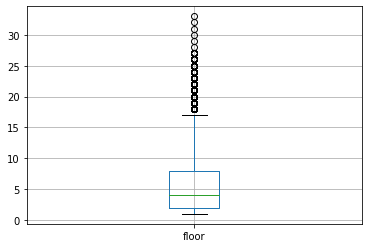

In [84]:
#Построим диаграмму размаха
data.boxplot(column='floor')

Вывод: аномалий не обнаружено

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'kitchen_area'</b>

In [85]:
#Выведем числовое описание данных
data['kitchen_area'].describe()

count    21243.000000
mean        10.495809
std          5.700084
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

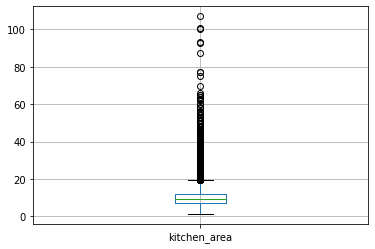

In [86]:
#Построим диаграмму размаха
data.boxplot(column='kitchen_area')

Вывод: Выбросы есть, но кухни могут быть как очень маленькими - кухни-ниши, так и очень большими. Считаю, что маленькие значения и выбросы  больше 20 в данном случае не являются аномалиями

In [87]:
#Проверим максимальное значение
data.query('kitchen_area == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0


Вывод: аномалии не найдено

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'airports_nearest'</b>

In [88]:
#Выведем числовое описание данных
data['airports_nearest'].describe()

count    16470.000000
mean     28810.368792
std      12642.594895
min          0.000000
25%      18551.250000
50%      26764.500000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

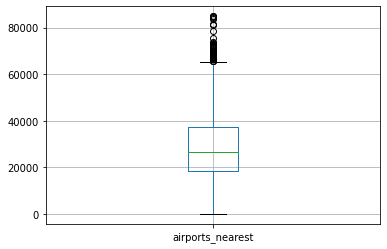

In [89]:
#Построим диаграмму размаха
data.boxplot(column='airports_nearest')

In [90]:
#Проверим значение 0
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0


In [91]:
#Заполним медианным значением для Санкт-Петербурга
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].median()

In [92]:
#Заново выведем числовое описание данных
data['airports_nearest'].describe()

count    16470.000000
mean     28811.995446
std      12640.611167
min       6450.000000
25%      18553.250000
50%      26765.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Вывод: Аномалии устранены

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'cityCenters_nearest'</b>

In [93]:
#Выведем числовое описание данных
data['cityCenters_nearest'].describe()

count    16491.000000
mean     14241.459948
std       8649.891987
min        181.000000
25%       9330.500000
50%      13107.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

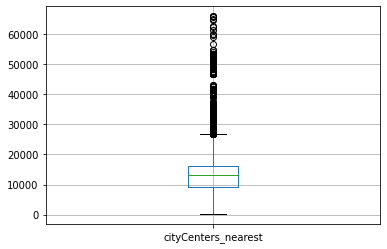

In [94]:
#Построим диаграмму размаха
data.boxplot(column = 'cityCenters_nearest')

Вывод: Выбросы аномалиями не считаю

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'parks_around3000'</b>

In [95]:
#Выведем числовое описание данных
data['parks_around3000'].describe()

count    21243.000000
mean         0.472485
std          0.747864
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

<AxesSubplot:>

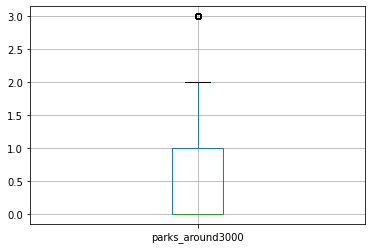

In [96]:
#Построим диаграмму размаха
data.boxplot(column='parks_around3000')

Вывод: аномалии не обнаружены

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'parks_nearest'</b>

In [97]:
#Выведем числовое описание данных
data['parks_nearest'].describe()

count    7322.000000
mean      488.519667
std       338.295798
min         1.000000
25%       288.000000
50%       453.500000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

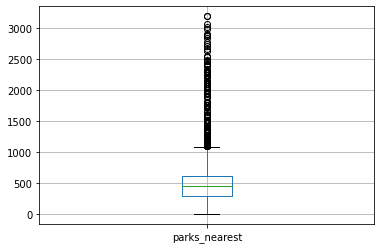

In [98]:
#Построим диаграмму размаха
data.boxplot(column='parks_nearest')

Вывод: аномалий не обнаружено

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'ponds_around3000'</b>

In [99]:
#Выведем числовое описание данных
data['ponds_around3000'].describe()

count    21243.000000
mean         0.593749
std          0.885659
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

<AxesSubplot:>

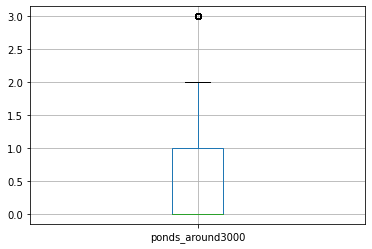

In [100]:
#Построим диаграмму размаха
data.boxplot(column='ponds_around3000')

Вывод: аномалий не обнаружено

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'ponds_nearest'</b>

In [101]:
#Выведем числовое описание данных
data['ponds_nearest'].describe()

count    8196.000000
mean      518.811371
std       277.251736
min        13.000000
25%       295.000000
50%       503.000000
75%       731.250000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:>

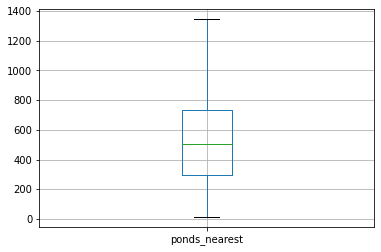

In [102]:
#Построим диаграмму размаха
data.boxplot(column='ponds_nearest')

Вывод: аномалий не обнаружено

<b>Обработка и удаление аномалий(редких значений)<br>
Столбец 'days_exposition'</b>

In [103]:
#Выведем числовое описание данных
data['days_exposition'].describe()

count    18289.000000
mean       185.648477
std        222.461298
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

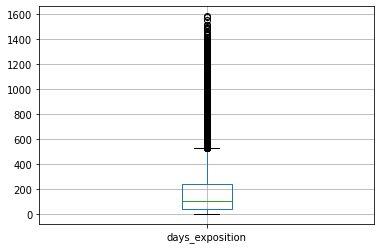

In [104]:
#Строим диаграмму размаха
data.boxplot(column='days_exposition')

Вывод:  Выбросы не являются аномалиями, аномалий не найдено

In [105]:
#Сбросим индексы датасета после удаления пустых значений и аномалий
data.reset_index(inplace=True)

### Посчитайте и добавьте в таблицу новые столбцы

In [106]:
#Добавляем столбец с ценой 1 м.кв.
data['sqm_price'] = data['last_price']/data['total_area']

In [107]:
#Добавляем столбцы с днём недели, с месяцем и годом публикации объяаления

#Переводим строковые значения столбца first_day_exposition в даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Добавляем столбец weekday_exposition с днём публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#Добавляем столбец month_exposition с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

#Добавляем столбец year_exposition с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [108]:
#Добавляем столбец с типом этажа floor_type

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis = 1)

In [109]:
#Добавляем столбец cityCenters_nearest_km с расстоянием до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

### Проведите исследовательский анализ данных

<b>Общая площадь</b>

In [110]:
#Выводим числовое описание данных
data['total_area'].describe()

count    21243.000000
mean        60.410876
std         32.988997
min         14.000000
25%         40.600000
50%         52.400000
75%         70.000000
max        590.000000
Name: total_area, dtype: float64

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

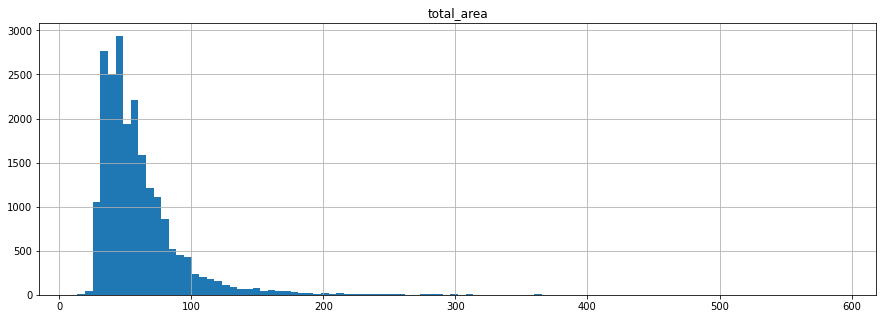

In [111]:
#Строим гистограмму распределения
data.hist(column='total_area', bins=100, figsize=(15, 5))

<AxesSubplot:>

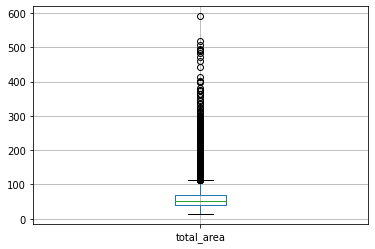

In [112]:
#Строим диаграмму размаха
data.boxplot(column='total_area')

Вывод: Общая площадь имеет значения от 14 кв.м. до 590 кв.м. Наибольшее количество квартир имеют площадь в районе 50 кв.м. Значения площади свыше  114 кв.м. являются выбросами.

<b>Жилая площадь</b>

In [113]:
#Выводим числовое описание данных
data['living_area'].describe()

count    21243.000000
mean        34.514268
std         21.261668
min          6.000000
25%         18.800000
50%         30.100000
75%         42.600000
max        409.000000
Name: living_area, dtype: float64

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

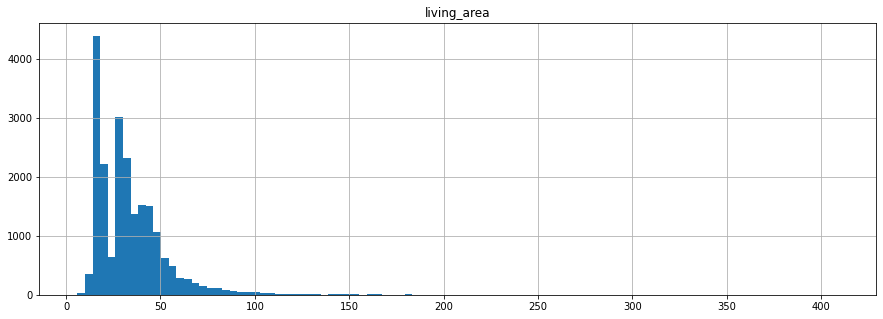

In [114]:
#Строим гистограмму распределения
data.hist(column='living_area', bins=100, figsize=(15, 5))

<AxesSubplot:>

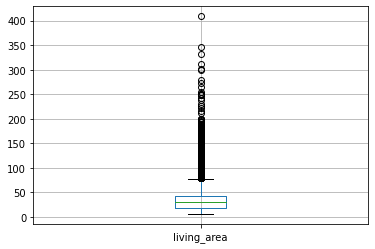

In [115]:
#Строим диаграмму размаха
data.boxplot(column='living_area')

Вывод: Жилая площадь принимает значения от 6 до 409 кв.м. Самые частые значения от 18 до 50 кв.м. Значения свыше 79,5 являются выбросами

<b>Площадь кухни<b>

In [116]:
#Выводим числовое описание данных
data['kitchen_area'].describe()

count    21243.000000
mean        10.495809
std          5.700084
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

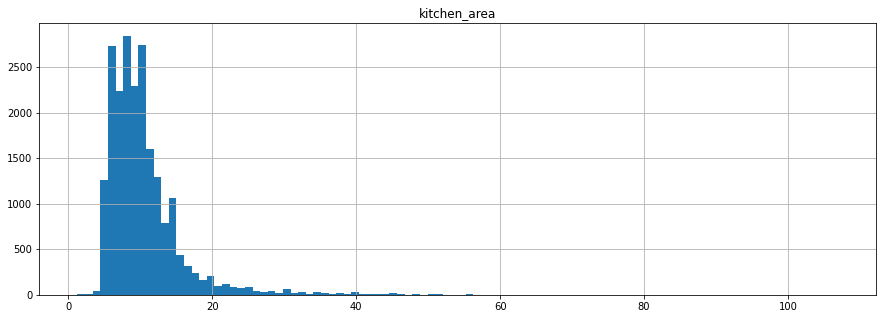

In [117]:
#Строим гистограмму распределения
data.hist(column='kitchen_area', bins=100, figsize=(15, 5))

<AxesSubplot:>

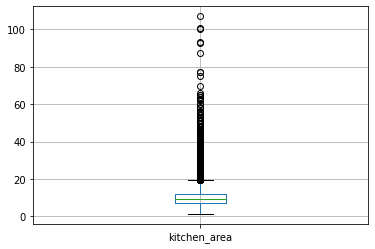

In [118]:
#Строим диаграмму размаха
data.boxplot(column='kitchen_area')

Вывод: Площадь кухни принимает значения от 1,3 до 107 кв.м. Наибольшее число значения в диапазон от 7 до 12 кв.м. Значения после 19,5 кв.м. являются выбросами 

<b>Цена объекта</b>

In [119]:
#Выводим числовое описание данных
data['last_price'].describe()

count    2.124300e+04
mean     6.289164e+06
std      6.326068e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      9.900000e+07
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

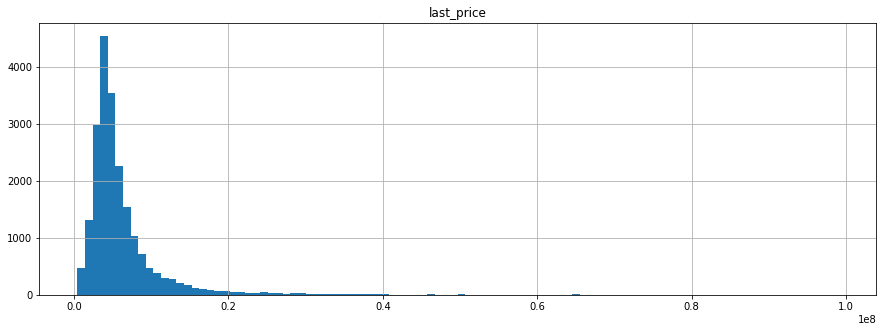

In [120]:
#Строим гистограмму распределения
data.hist(column='last_price', bins=100, figsize=(15, 5))

<AxesSubplot:>

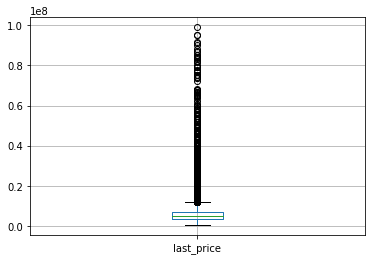

In [121]:
#Строим диаграмму размаха
data.boxplot(column='last_price')

Вывод: цена объекта принимает значения от 430 000 до 99 000 000 р. Наиболее число значений в диапазоне от 3 500 000 до 6 800 000 р. Значения свыше 11 750 000 р. являются выбросами.

<b>Количество комнат</b>

In [122]:
#Выводим числовое описание данных
data['rooms'].describe()

count    21243.000000
mean         2.093490
std          1.055969
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

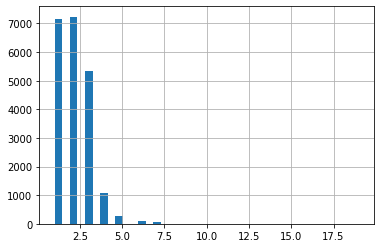

In [123]:
#Строим гистограмму распределения
data['rooms'].hist(bins=40)

<AxesSubplot:>

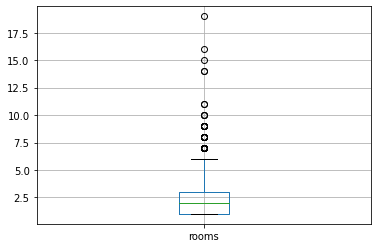

In [124]:
#Строим диаграмму размаха
data.boxplot(column='rooms')

Вывод: Количество комнат в квартирах составляет от 1 до 19. Наиболее часто встречаются значения от 1 до 3. Значения свыше 6 являются выбросами

<b>Высота потолков</b>

In [125]:
#Выводим числовое описание данных
data['ceiling_height'].describe()

count    13447.000000
mean         2.724730
std          0.281224
min          2.250000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

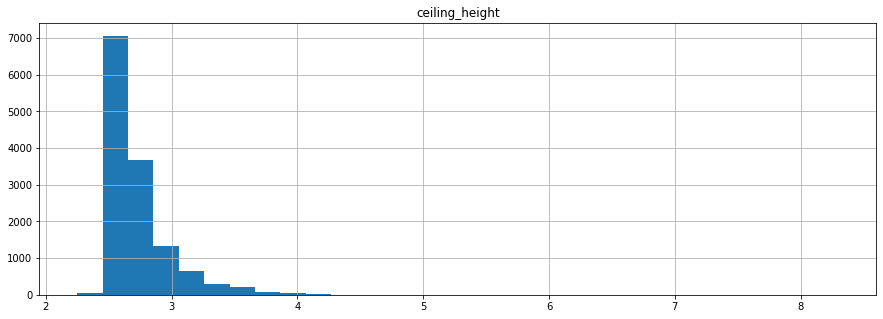

In [126]:
#Строим гистограмму распределения
data.hist(column='ceiling_height', bins=30, figsize=(15, 5))

<AxesSubplot:>

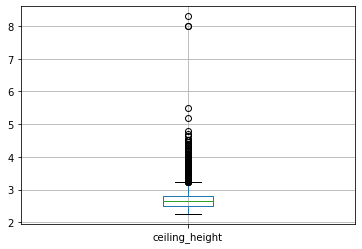

In [127]:
#Строим диаграмму размаха
data.boxplot(column='ceiling_height')

Вывод: Высота потолка принимает значения от 2,25 до 8,3 м. Наибольшее число значений в диапазоне от 2,51 до 2,8 м. Значения свыше 3,23 м. являются выбросами

<b>Этаж квартиры</b>

In [128]:
#Выводим числовое описание данных
data['floor'].describe()

count    21243.000000
mean         5.856141
std          4.833030
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

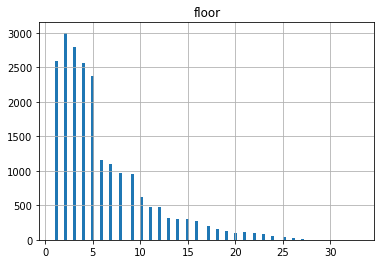

In [129]:
#Строим гистограмму распределения
data.hist(column='floor', bins=100)

<AxesSubplot:>

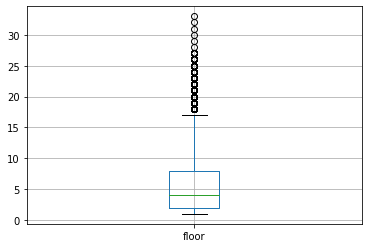

In [130]:
#Выводим диаграмму размаха
data.boxplot(column='floor')

Вывод: этаж квартиры принимает значения от 1 до 33. Наибольшее число квартир расположены на этажах с 1 по 5 включительно. Значения свыше 17 являются выбросами.

<b>Тип этажа квартиры<b>

<AxesSubplot:>

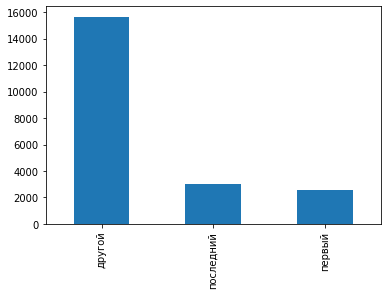

In [131]:
#Строим столбчатую диаграмму
data['floor_type'].value_counts().plot(kind='bar')

Вывод: наибольшее число квартира расположено на этажах со 2-го по предпоследний включительно. Квартир на первых и последних этажах примерно одинаковое количество.

<b>Общее количество этажей в доме<b>

In [132]:
#Выводим числовое описание данных
data['floors_total'].describe()

count    21204.000000
mean        10.581683
std          6.511290
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         36.000000
Name: floors_total, dtype: float64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

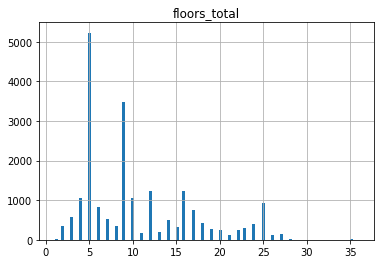

In [133]:
#Строим гистограмму распределения
data.hist(column='floors_total', bins=100)

<AxesSubplot:>

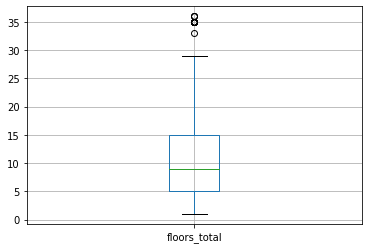

In [134]:
#Строим диаграмму размаха
data.boxplot(column='floors_total')

Вывод: число этажей в домах составляет от 1 до 36. Наболее часто параметр принимает значения 5, 9, 12 и 16. Значения свыше 30 являются выбросами

<b>Расстояние до центра города в метрах</b>

In [135]:
#Выводим числовое описание данных
data['cityCenters_nearest'].describe()

count    16491.000000
mean     14241.459948
std       8649.891987
min        181.000000
25%       9330.500000
50%      13107.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

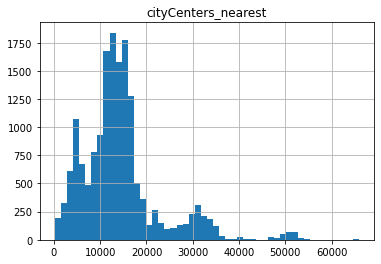

In [136]:
#Строим гистограмму распределения
data.hist(column='cityCenters_nearest', bins=50)

<AxesSubplot:>

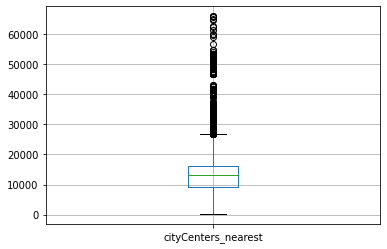

In [137]:
#Выводим диаграмму размаха
data.boxplot(column='cityCenters_nearest')

Вывод: для объектов расстояние от центра города составляет от 181 до 65 968 м. Больше всего значений в диапазоне от 9 000 до 20 000 м. Значения свыше 26 700 м. являются выбросами.

<b>Расстояние до ближайшего аэропорта</b>

In [138]:
#Выводим числовое описание данных
data['airports_nearest'].describe()

count    16470.000000
mean     28811.995446
std      12640.611167
min       6450.000000
25%      18553.250000
50%      26765.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

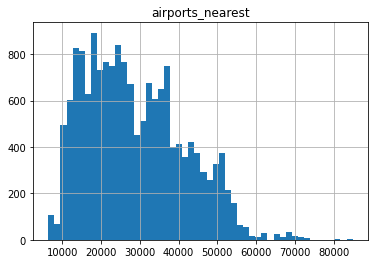

In [139]:
#Строим гистограмму распределения
data.hist(column='airports_nearest', bins=50)

<AxesSubplot:>

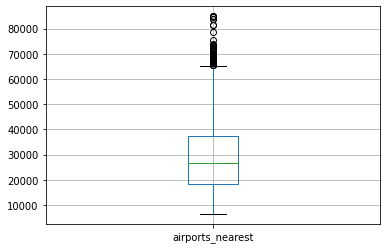

In [140]:
#Выводим диаграмму распределения
data.boxplot(column='airports_nearest')

Вывод: Параметр принимает значения от 6 450 до 84 869 м. Наибольшее число значений в диапазоне от 10 000 до 37 000. Значения свыше 65 445 м. являются выбросами

<b>Расстояние до ближайшего парка</b>

In [141]:
#Выводим числовое описание данных
data['parks_nearest'].describe()

count    7322.000000
mean      488.519667
std       338.295798
min         1.000000
25%       288.000000
50%       453.500000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

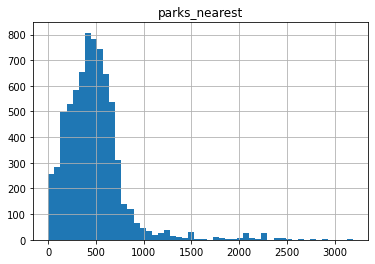

In [142]:
#Строим гистограмму распределения
data.hist(column='parks_nearest', bins=50)

<AxesSubplot:>

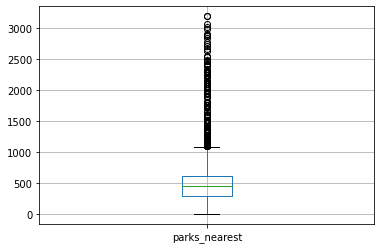

In [143]:
#Выводим диаграмму размаха
data.boxplot(column='parks_nearest')

Вывод: Данный параметр принимает значения от 1 до 3 190 м. Наибольшее число значений в диапазоне от 100 до 750 м. Значения свыше 1 095 м. являются выбросами. 

<b>День и месяц публикации объявления</b>

array([[<AxesSubplot:title={'center':'weekday_exposition'}>]],
      dtype=object)

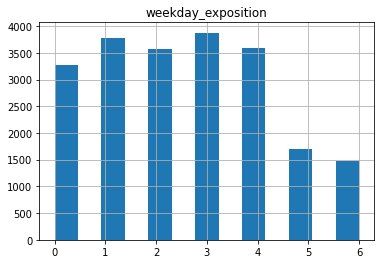

In [144]:
#Строим гистограмму распределения для параметра "день публикации объявления" - стобец weekday_exposition
data.hist(column='weekday_exposition', bins=13)

Вывод: Наибольшее число объявлений было размещено во вторник(1) и в четверг(3), чуть меньше в среду(2) и пятницу(4) и ещё чуть меньше в понедельник(0). В субботу(5) и воскресенье(6) число размещённых объявлений было меньше более чем в 2 раза в сравнении с  объявлениями, размещёнными в рабочие дни.

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

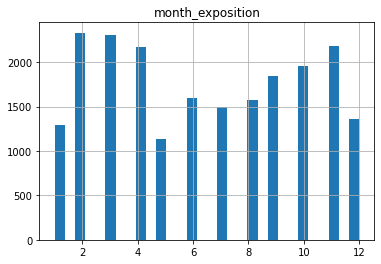

In [145]:
#Строим гистограмму для параметра "месяц публикации объявления" - стобец month_exposition
data.hist(column='month_exposition', bins=30)

Вывод: Наименьшее число размещённых объявлений было в январе(1) и мае(5). В феврале(2) число размещений резко увеличивалось и постепенно спадало до апреля(4) включительно. В мае(5) был резкий спад, в июне(6) число размещений резко выросло и практически не менялось до авгуса(8) включительно. С сентября(9) заметен резкий рост и плавное увеличение числа размещений до ноября(11) включительно, затем резикий спад в декабре(12)

<b>Как быстро продавались квартиры</b>

In [146]:
#Выводим числовое описание данных
data['days_exposition'].describe()

count    18289.000000
mean       185.648477
std        222.461298
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [147]:
#Выводим среднее время время продажи и медиану
print('Среднее время продажи: ', int(data['days_exposition'].describe()['mean']), 'дней')
print('Медиана времени продажи: ', int(data['days_exposition'].describe()['50%']), 'дня')

Среднее время продажи:  185 дней
Медиана времени продажи:  102 дня


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

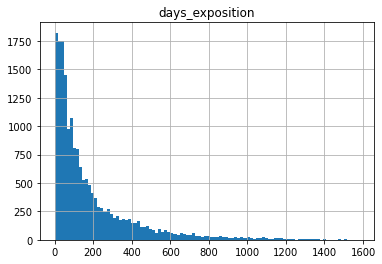

In [148]:
#Строим гистограмму распределения
data.hist(column='days_exposition', bins=100)

<AxesSubplot:>

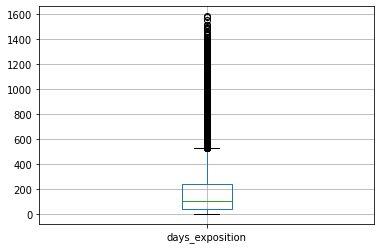

In [149]:
#Выводим диаграмму размаха
data.boxplot(column='days_exposition')

Вывод: Быстрыми можно считать продажи до 45 дней, а необычно долгими дольше 530 дней (выбросы на диаграмме размаха).

<b>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</b>

График зависимости полной стоимости объекта от общей площади

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

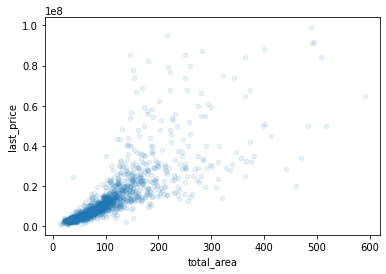

In [150]:
dpv=data.pivot_table(index='total_area', values='last_price').reset_index()
dpv.plot(kind='scatter', x='total_area', y='last_price', alpha=0.1)

In [151]:
#Выводим корреляцию полной стоимости и общей площади
dpv['last_price'].corr(dpv['total_area'])

0.809794262422773

Вывод: Заметна прямая зависимость цены объекта от общей площади. Это актуально, если площадь объекта меньше 200 кв. м. Для объектов с большей площадью зависимость стоимости от общей площади меньше

График зависимости полной стоимости объекта от жилой площади

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

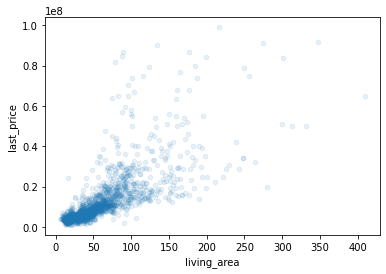

In [152]:
dpv=data.pivot_table(index='living_area', values='last_price').reset_index()
dpv.plot(kind='scatter', x='living_area', y='last_price', alpha=0.1)

In [153]:
#Выводим корреляцию полной стоимости и жилой площади
dpv['last_price'].corr(dpv['living_area'])

0.7625186563962878

Вывод: Заметна прямая зависимость цены объекта от жилой площади. Это актуально, если жилая площадь меньше 120 кв. м. Для объектов с большей жилой площадью зависимость стоимости от жилой площади меньше

График зависимости полной стоимости объекта от площади кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

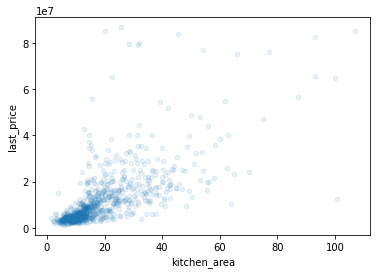

In [154]:
dpv=data.pivot_table(index='kitchen_area', values='last_price').reset_index()
dpv.plot(kind='scatter', x='kitchen_area', y='last_price', alpha=0.1)

In [155]:
#Выводим корреляцию полной стоимости и площади кухни
dpv['last_price'].corr(dpv['kitchen_area'])

0.6948362615940978

Вывод: Заметна прямая зависимость цены объекта от площади кухни. Это актуально, если площадь кухни меньше 40 кв. м. Для объектов с большей площадью кухни зависимость меньше

График зависимости полной стоимости объекта от количества комнат

<AxesSubplot:xlabel='rooms'>

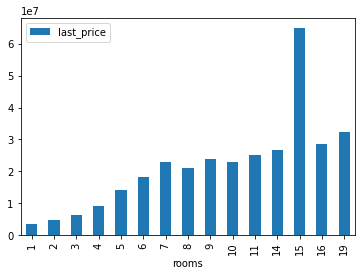

In [156]:
dpv=data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
dpv.plot(kind='bar', x='rooms', y='last_price')

In [157]:
#Выводим корреляцию полной стоимости и количества комнат
dpv['last_price'].corr(dpv['rooms'])

0.7880654210074454

Вывод: Заметна прямая зависимость полной стоимости от количества комнат. Особенно сильно увеличение числа комнат влияет на увеличение стоимости у квартир с числом комнат до 6. Для квартир с бОльшим числом комнат полная стоимость также увеличивается с увеличением числа комнат, но уже не так сильно. Заметен пик для 15-и комнатных квартир. Вероятно, это связано с малым количество данных (1 квартира)  и это аномалия.

График зависимости полной стоимости объекта от типа этажа

<AxesSubplot:xlabel='floor_type'>

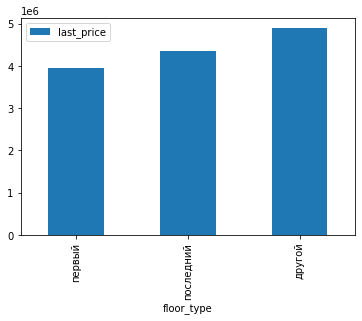

In [158]:
floor_type_pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values('last_price')
floor_type_pivot.plot.bar()

Вывод: Самая низкая стоимость у квартир, расположенных на первом этаже. У квартир на последних этажах стоимость выше. Самая выокая стоимость у квартир, которые расположены не на первом и не на последнем этаже

Графики зависимости полной стоимости объекта от даты размещения

<AxesSubplot:xlabel='weekday_exposition'>

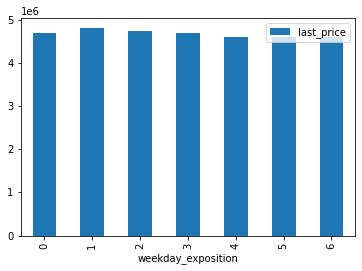

In [159]:
#График зависимости полной стоимости объекта от дня недели размещения
weekday_pivot = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
weekday_pivot.plot(kind='bar')

Вывод: день недели размещения объявления объявления незначительно влияет на полную стоимость объекта

<AxesSubplot:xlabel='month_exposition'>

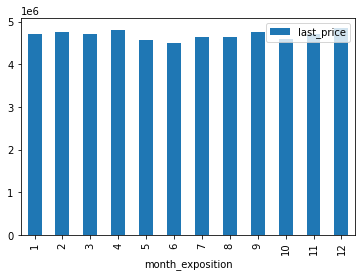

In [160]:
#График зависимости полной стоимости объекта от месяца размещения
month_pivot = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
month_pivot.plot(kind='bar')

Вывод: месяц размещения незначительно влияет на полную стоимость объекта

<AxesSubplot:xlabel='year_exposition'>

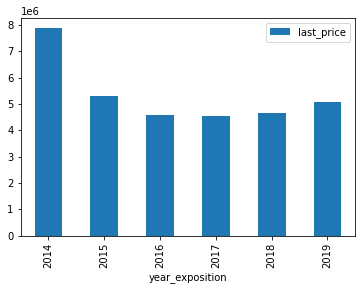

In [161]:
#Графики зависимости полной стоимости объекта от года размещения
year_pivot = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
year_pivot.plot(kind='bar')

Вывод: в 2015-м году средняя стоимость размещаемых на продажу квартир резко снизилась, в 2016-м снизилась немного, а с 2017-го по 2019 -й наблюдается небольшой рост

<AxesSubplot:xlabel='year_exposition'>

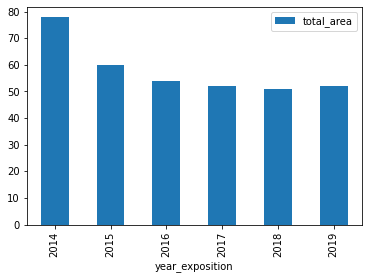

In [162]:
#График зависимости средней площади квартиры в зависимости от года размещения объявления
data.pivot_table(index='year_exposition', values='total_area', aggfunc='median').plot(kind='bar')

Вывод: Падение стоимости цен начиная с 2015-го года может быть связано не с уменьшением цены квадратного маетра, а с уменьшением площади размещаемых на продажу квартир.

<b>Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</b>

In [163]:
#Создаём сводную таблицу по столбцу 'locality_name'. Медиану цены кв.м. считаем по столбцу 'sqm_price',
#количество объявлений по столбцу total_area, сортируем таблицу по этому-же столбцу по убыванию
data.pivot_table(
    index='locality_name', values=['total_area', 'sqm_price'], aggfunc={'sqm_price':'median', 'total_area':'count'}
    ).sort_values('total_area', ascending=False).head(10)

,sqm_price,total_area
locality_name,,
Санкт-Петербург,104306.568158,14222
Мурино,84507.042254,475
поселок Шушары,77173.913043,397
Кудрово,95435.612635,386
Всеволожск,65789.473684,351
Пушкин,100000.000000,337
Колпино,74725.274725,321
Гатчина,67671.510409,290
поселок Парголово,92202.380952,288


Вывод: Среди 10-и населённых пунктов с наибольшим числом объявлений самая высокая стомость квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге

<b>Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра</b>

In [164]:
#Создаём таблицу data_spb, куда включаем только объявления для Санкт-Петербурга
data_spb = data.query('locality_name == "Санкт-Петербург"')

#Создаём сводную таблицу по data_spb по столбцу 'cityCenters_nearest_km' со значениями из столбца 'sqm_price'
data_spb.pivot_table(index='cityCenters_nearest_km', values='sqm_price').reset_index()

,cityCenters_nearest_km,sqm_price
0,0.181,195591.194969
1,0.208,172619.047619
2,0.215,109900.000000
3,0.287,88796.296296
4,0.291,101321.585903
...,...,...
6013,28.109,68468.468468
6014,28.644,85191.334598
6015,28.806,79890.310786
6016,29.263,56526.806527


In [165]:
#Создаём список со значениями 1-30, где каждое значение соответстует километру удалённости от центра
km_list = list(range(1, 31))

#Создаём пустой список для цены 1 кв.м. для каждого километра удалённости от центра
km_price = []

#Проходимся циклом по списку километров удалённости km_list,
#считаем медиану цены 1 кв.м. по столбцу 'sqm_price'для условий удалённости по столбцу 'cityCenters_nearest_km',
#добавляем медиану цены дял каждого км. удалённости в список km_price
for km in km_list:
    if km == 1:
        km_price.append(data_spb.loc[data_spb['cityCenters_nearest_km'] <= km, 'sqm_price'].median())
    else:
        km_price.append(data_spb.loc[(km-1 <= data_spb['cityCenters_nearest_km']) & (data_spb['cityCenters_nearest_km'] < km), 'sqm_price'].median())

<AxesSubplot:xlabel='km'>

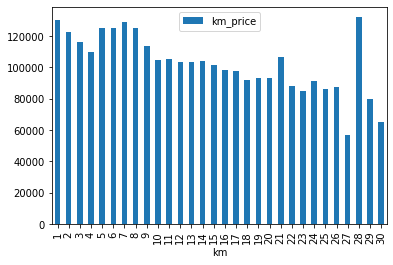

In [166]:
#Строим диаграмму средней цены 1 кв.м. для каждого км. по степени удалённости о тцентра
pd.DataFrame({'km': km_list, 'km_price': km_price}).plot(kind='bar', x='km', y='km_price')

Вывод: С увеличением расстояния от центра цена 1 кв.м. в целом уменьшается. Заметны пики для расстояний с 4-го по 8-й км, с 20-го по 21-й км и с 27-го по 28-й км. На растоянии с 26-го по 27-й км - резкий провал. 

### Общий вывод

**Среднее время продажи**<br>
В среднем время продажи квартиры составило 102 дня. Быстрыми можно считать продажи до 100 дней, а необычно долгими дольше 530 дней.

**Какие факторы влияют на цену квартиры**<br>
- Общая площадь<br>
Заметна прямая зависимость цены объекта от общей площади. Это ярко выражено, если площадь объекта меньше 200 кв. м. Для объектов с большей площадью зависимость стоимости от общей площади меньше.<br><br>
- Жилая площадь<br>
Заметна прямая зависимость цены объекта от жилой площади. Это ярко выражено, если жилая площадь меньше 120 кв. м. Для объектов с большей жилой площадью зависимость стоимости от жилой площади меньше.<br><br>
- Площадь кухни<br>
Заметна прямая зависимость цены объекта от площади кухни. Это ярко выражено, если площадь кухни меньше 40 кв. м. Для объектов с большей площадью кухни зависимость меньше.<br><br>
- Количество комнат<br>
Заметна прямая зависимость полной стоимости от количества комнат. Особенно сильно увеличение числа комнат влияет на увеличение стоимости у квартир с числом комнат до 6. Для квартир с бОльшим числмо комнат полная стоимость также увеличивается с увеличением числа комнат, но уже не так сильно.<br><br>
- Тип этажа квартиры<br>
Самая низкая стоимость у квартир, расположенных на первом этаже. У квартир на последних этажах стоимость выше. Самая выокая стоимость у квартир, которые расположены не на первом и не на последнем этаже.<br><br>
- День, месяц и год размещения объявления<br>
День недели и месяц размещения объявления незначительно влияет на полную стоимость объекта. В 2015-м году средняя стоимость размещаемых на продажу квартир резко снизилась, в 2016-м снизилась немного, а с 2017-го по 2019 -й наблюдается небольшой рост.<br><br>

**Зависимость стоимости квадратного метра от удалённости от центра города**<br>
При уменьшении расстояния до центра города стоимость квадратного метра увеличивается